In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [91]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/blood_transfusion.csv"
df = pd.read_csv(url)
df.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


In [92]:
df.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

In [93]:
df.shape

(748, 5)

<AxesSubplot:>

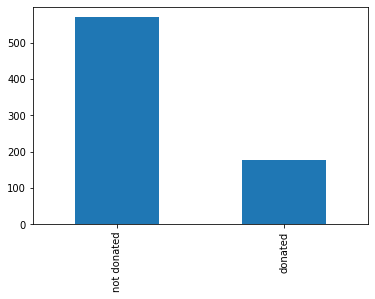

In [94]:
df.Class.value_counts().plot(kind='bar')

In [95]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [96]:
le = LabelEncoder()
y = le.fit_transform(y)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [98]:
estimator = make_pipeline(StandardScaler(), DecisionTreeClassifier())
estimator

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [99]:
estimator.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__random_state': None,
 'decisiontreeclassifier__splitter': 'best'}

In [100]:
params = {
    "decisiontreeclassifier__criterion":["gini", 'entropy', 'log_loss'],
    'decisiontreeclassifier__splitter' :['best', 'random'],
    'decisiontreeclassifier__max_depth':[5, 10, 15, 20, 25, 30]
    }

In [101]:
grid = GridSearchCV(estimator, params, cv=3, verbose=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=best;, score=0.760 total time=   0.0s
[CV 2/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=best;, score=0.749 total time=   0.0s
[CV 3/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=best;, score=0.729 total time=   0.0s
[CV 1/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=random;, score=0.740 total time=   0.0s
[CV 2/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=random;, score=0.764 total time=   0.0s
[CV 3/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=random

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'decisiontreeclassifier__max_depth': [5, 10, 15, 20,
                                                               25, 30],
                         'decisiontreeclassifier__splitter': ['best',
                                                              'random']},
             verbose=3)

In [102]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=5,
                                        splitter='random'))])

In [103]:
out = pd.DataFrame(grid.cv_results_)

In [104]:
out.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
25,0.002729,0.003859,0.002675,0.003782,log_loss,5,random,{'decisiontreeclassifier__criterion': 'log_los...,0.765,0.793970,0.763819,0.774263,0.013943,1
13,0.005919,0.004245,0.000000,0.000000,entropy,5,random,{'decisiontreeclassifier__criterion': 'entropy...,0.775,0.773869,0.753769,0.767546,0.009753,2
0,0.007999,0.000053,0.005352,0.003785,gini,5,best,"{'decisiontreeclassifier__criterion': 'gini', ...",0.760,0.748744,0.728643,0.745796,0.012970,3
15,0.004048,0.003292,0.000662,0.000936,entropy,10,random,{'decisiontreeclassifier__criterion': 'entropy...,0.765,0.748744,0.723618,0.745787,0.017023,4
1,0.005250,0.003714,0.000000,0.000000,gini,5,random,"{'decisiontreeclassifier__criterion': 'gini', ...",0.740,0.763819,0.728643,0.744154,0.014658,5
3,0.003590,0.003344,0.000000,0.000000,gini,10,random,"{'decisiontreeclassifier__criterion': 'gini', ...",0.770,0.738693,0.713568,0.740754,0.023084,6
4,0.004548,0.003472,0.000786,0.001111,gini,15,best,"{'decisiontreeclassifier__criterion': 'gini', ...",0.745,0.738693,0.723618,0.735771,0.008970,7
12,0.003169,0.004481,0.000000,0.000000,entropy,5,best,{'decisiontreeclassifier__criterion': 'entropy...,0.775,0.713568,0.713568,0.734045,0.028959,8
2,0.002688,0.003801,0.002651,0.003749,gini,10,best,"{'decisiontreeclassifier__criterion': 'gini', ...",0.755,0.738693,0.703518,0.732404,0.021483,9
24,0.002687,0.003800,0.002800,0.003960,log_loss,5,best,{'decisiontreeclassifier__criterion': 'log_los...,0.775,0.718593,0.703518,0.732370,0.030766,10


In [105]:
model = grid.best_estimator_

In [106]:
y_pred = model.predict(X)
print(confusion_matrix(y, y_pred))

[[ 23 155]
 [ 11 559]]


In [107]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.13      0.22       178
           1       0.78      0.98      0.87       570

    accuracy                           0.78       748
   macro avg       0.73      0.55      0.54       748
weighted avg       0.76      0.78      0.72       748



In [108]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [112]:
estimator.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
params = {
          'kneighborsclassifier__metric':['minkowski', 'entropy', 'log_loss'],
          'kneighborsclassifier__weights': ['uniform'],
          
}